## Hash Table Study

In [4]:
import hashlib
from tqdm import tqdm

NUM_OF_HASH_BUCKETS = 4096

inputFilename = 'dictionary.txt'

def convertStrToBucketNum(input_str, NumOfBuckets):
    hashobj = hashlib.sha3_512(input_str.encode('utf-8'))
    val = int.from_bytes(hashobj.digest(), 'big')
    return (val % NumOfBuckets)
   
# Initialize a hash table
myHashTable = {}
for num in range(NUM_OF_HASH_BUCKETS):
    myHashTable[num] = []

In [5]:
# Read the files and construct a hash table
with open(inputFilename) as file:
    Lines = file.readlines()
    for item in tqdm(Lines): 
        bucket_num = convertStrToBucketNum(item, NUM_OF_HASH_BUCKETS)
        #print(f'bucket-{bucket_num} = {item}')
        #print(myHashTable[bucket_num].append(item))
        myHashTable[bucket_num].append(item.rstrip("\n"))


100%|██████████| 349882/349882 [00:01<00:00, 244780.21it/s]


In [6]:
totalLength = 0
maxBucketLength = 0
bucketWithLongestLength = 0
minBucketLength = 99999999
bucketwithMinLenth = 0

listOfAllBucketLengths = []

# Go over all the hash buckets of the table and collect the statistics
for num in tqdm(range(NUM_OF_HASH_BUCKETS)):
    currentBucketLength = len(myHashTable[num])
    totalLength += currentBucketLength
    listOfAllBucketLengths.append(currentBucketLength)

    if currentBucketLength > maxBucketLength:
        maxBucketLength = currentBucketLength
        bucketWithLongestLength = num
    #print(f'Run-{num} totalLength={totalLength} maxLength={maxBucketLength}')
    if currentBucketLength < minBucketLength:
        minBucketLength = currentBucketLength
        bucketwithMinLenth = num
 
avgBucketLength = totalLength / NUM_OF_HASH_BUCKETS
print(f'Check TotalLength = {totalLength}')
print(f'avgBucketLength = {avgBucketLength}')

print(f'maxBucketLength = {maxBucketLength}')
print(f'bucketWithLongestLength = {bucketWithLongestLength}')
print(myHashTable[bucketWithLongestLength])

print(f'minBucketLength = {minBucketLength}')
print('bucketWithMinLength = ')
print(myHashTable[bucketwithMinLenth])


100%|██████████| 4096/4096 [00:00<00:00, 909083.99it/s]

Check TotalLength = 349882
avgBucketLength = 85.42041015625
maxBucketLength = 124
bucketWithLongestLength = 1856
['agaielapai', 'anecdotical', 'beneventan', 'bentoeni', 'bhote', 'bilboes', 'blateness', 'blodgett', 'bowly', 'bret', 'bugled', 'buskard', 'butomus', 'caledonia', 'californicus', 'charshaf', 'colpoptosis', 'communistery', 'consulter', 'contel', 'costectomy', 'crinatory', 'custerpark', 'delegative', 'diaphragms', 'dickenson', 'disguise', 'disorders', 'dovecreek', 'egressor', 'erevan', 'ergatogynous', 'exagitation', 'fameful', 'fleeted', 'fokis', 'forehatchway', 'goddamns', 'greaseless', 'greensleeves', 'grouchingly', 'gustaw', 'gymnophiona', 'haddocker', 'heisenbugs', 'holethnic', 'hollandia', 'holzman', 'hormogonous', 'huzhu', 'ixtata', 'jacketed', 'jagpal', 'keraphyllous', 'kerns', 'laryngology', 'laszlo', 'loxodromical', 'magherafelt', 'mbandaka', 'mendelian', 'miarolitic', 'mineowner', 'mishnic', 'monde', 'morrisean', 'muckraking', 'nachnet', 'nestable', 'nuncupatory', 'o

[54, 59, 59, 59, 59, 59, 60, 60, 60, 61, 61, 61, 61, 62, 62, 63, 63, 63, 63, 63, 63, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71,

collections.Counter

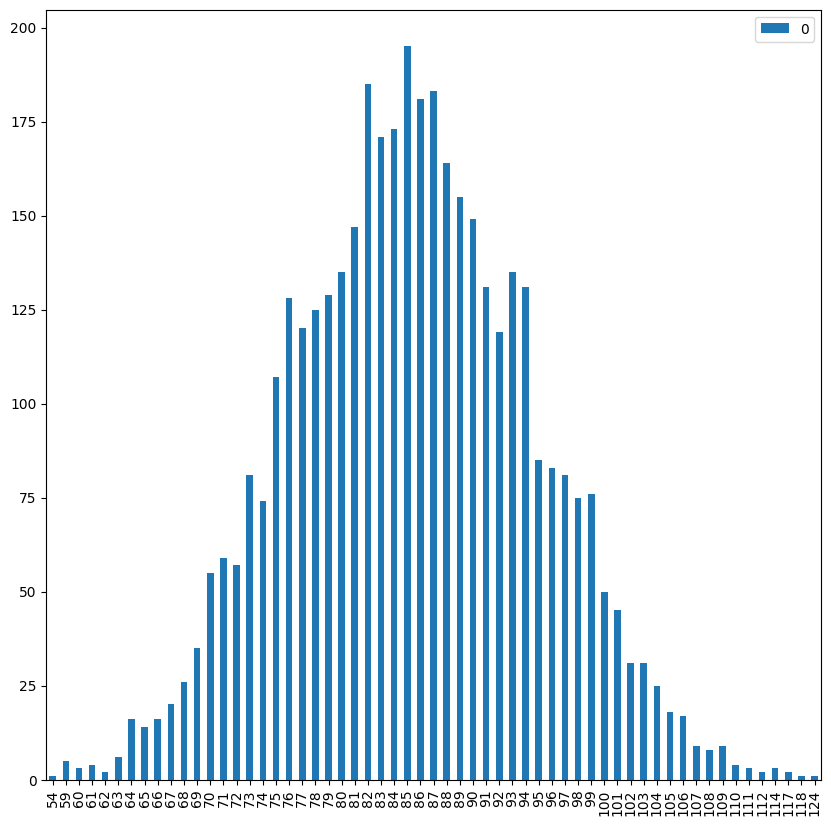

In [17]:
# code taken from https://stackoverflow.com/questions/55897076/creating-a-plot-of-frequency-of-items-in-a-list-in-python

from collections import Counter
import pandas

listOfAllBucketLengths.sort()
data = listOfAllBucketLengths
count = Counter(data)
df = pandas.DataFrame.from_dict(count, orient='index')
df.plot(figsize=(10,10), kind='bar')
df.plot(xlabel='Hashchain Length', ylabel='Frequency')

print(data)
type(count)